(4.8587792760014565, 14.80142786070299)

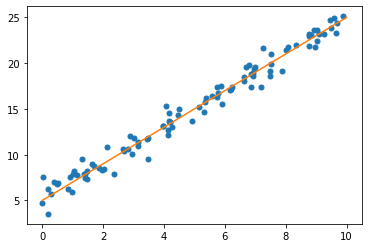

In [8]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

plt.figure()
plt.plot(x, y, "o", ms = 5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx);

np.mean(x), np.mean(y)